Analisis de resultados del WebScraping.

### Librerias:

In [8]:
import os
import Keys
import folium
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import GoogleV3

### Carga de archivos

Se cargan los dataframes diferentes y se unen para visualizar su contenido, realizar modificaciones necesarias y proceder a agruparlos una vez validemos que estan bien sus datos y estructura

In [9]:
# Directorio que contiene los archivos CSV
directorio = './Resultados'  # Reemplaza con la ruta real de tu carpeta

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Itera a través de los archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith(".csv"):
        # Lee el archivo CSV y conviértelo en un DataFrame
        path = os.path.join(directorio, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

# Combina los DataFrames en uno solo y lo descarga
df = pd.concat(dataframes, ignore_index=True)
df_final = df.to_csv("./Resultados/df_final.csv", index=False)

In [10]:
#df_computrabajo = pd.read_csv('./Resultados/Resultado_computrabajo.csv')
#df_jobz = pd.read_csv('./Resultados/Resultado_jobz.csv')

### Nulos

Validamos si poseen datos nulos en cada uno de los dataframe

In [11]:
df.isnull().sum()

Title           0
Location        0
Company         0
Unnamed: 0    925
dtype: int64

In [12]:
#df_computrabajo.isnull().sum()

In [13]:
#df_jobz.isnull().sum()

### Visualizar archivos

visualizamos su contenido y estructura para conocer más de cerca cada uno de los archivos

In [14]:
df

,Title,Location,Company,Unnamed: 0
0,Aprendiz Universitario en Ingeniería de Softwa...,Colombia,Bancolombia,NaN
1,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia,NaN
2,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia,NaN
3,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia,NaN
4,Aprendiz Universitario en Ingeniería de Sistem...,Colombia,Bancolombia,NaN
...,...,...,...,...
1070,Analista De Procesos Y Seguridad Ti,"Barranquilla, Atlántico, Colombia",ISES Ingeniería y Soluciones Especializadas,NaN
1071,Junior Java Developer – Vizcaya,"Antioquia, Colombia",Teknei,NaN
1072,Analista de bases de Datos Microsoft Dynamics ...,"Medellín, Antioquia, Colombia",E-Global S.A.,NaN
1073,Analista TIC - Profesional recién egresado o ...,"Bogota, D.C., Capital District, Colombia",MANPOWER PROFESSIONAL LTDA,NaN


In [15]:
#df_computrabajos

In [16]:
#df_jobz

### Transformaciones:

- Agrupar por titulos

In [17]:
df_por_ubicación = df.groupby('Location')['Title'].nunique().reset_index()
#df_por_ubicacion_computrabajo = df_computrabajo.groupby('Location')['Title'].nunique().reset_index()
#df_por_ubicacion_jobz = df_jobz.groupby('Location')['Title'].nunique().reset_index()

In [18]:
print(df_por_ubicación)

                                          Location  Title
0                              Antioquia, Colombia      1
1                     Barbosa, Antioquia, Colombia      1
2                Barranquilla, Atlántico, Colombia      6
3                       Bello, Antioquia, Colombia      2
4         Bogota, D.C., Capital District, Colombia     74
5                 Bucaramanga, Santander, Colombia      2
6                  Cali, Valle del Cauca, Colombia     13
7                       Capital District, Colombia      1
8                     Cartagena, Bolívar, Colombia      1
9                                         Colombia     32
10           Comuna 10 - Estadio, Tolima, Colombia      1
11                    Cota, Cundinamarca, Colombia      1
12                        Cúcuta Metropolitan Area      1
13                     Galapa, Atlántico, Colombia      1
14                Girardot, Cundinamarca, Colombia      1
15                      Girón, Santander, Colombia      1
16            

In [19]:
top_5_ubicacion = df_por_ubicación.sort_values('Title', ascending=False).head(5)

In [20]:
print(top_5_ubicacion)

                                    Location  Title
4   Bogota, D.C., Capital District, Colombia     74
9                                   Colombia     32
21             Medellín, Antioquia, Colombia     19
6            Cali, Valle del Cauca, Colombia     13
20             Medellin, Antioquia, Colombia     12


- Visualización: Grafico de barras de las 5 ubicaciones con más demandas de puestos

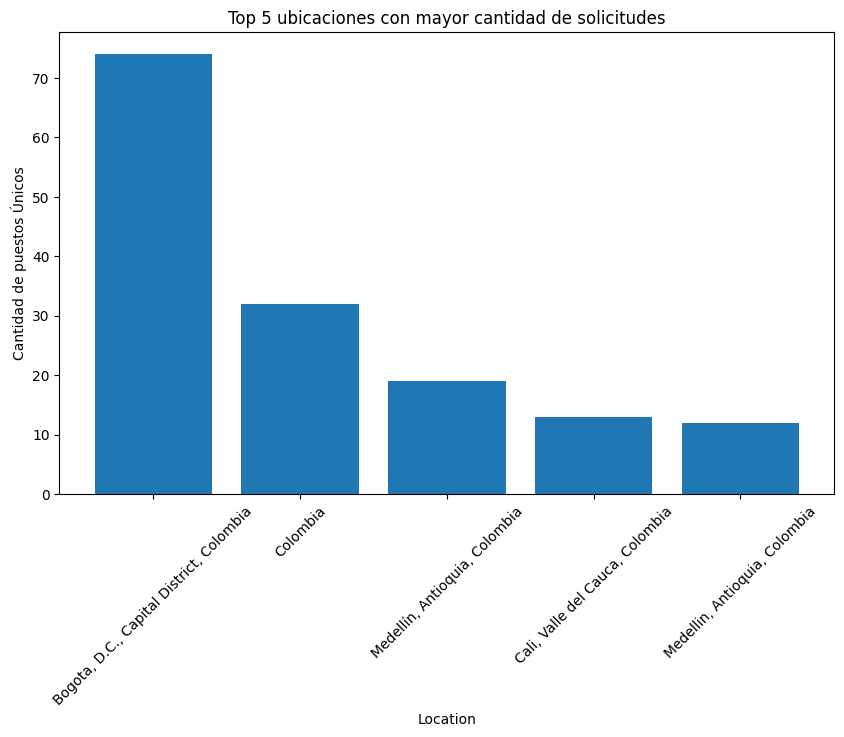

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_ubicacion['Location'], top_5_ubicacion['Title'])
plt.xlabel('Location')
plt.ylabel('Cantidad de puestos Únicos')
plt.title('Top 5 ubicaciones con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Agrupar por empresas

In [22]:
df_por_empresas = df.groupby('Company')['Title'].nunique().reset_index()
#df_por_empresas_computrabajo = df_computrabajo.groupby('Location')['Company'].nunique().reset_index()
#df_por_empresas_jobz = df_jobz.groupby('Location')['Company'].nunique().reset_index()

In [23]:
print(df_por_empresas)

                                  Company  Title
0                             ABCW Global      1
1                      ACIERTA HEADHUNTER      2
2                                ADA S.A.      7
3                            ARUS Oficial      3
4                      Accenture Colombia      1
..                                    ...    ...
85                                 VELAIO      1
86       WFM INFORMATICA Y TECNOLOGIA SAS      1
87                   World Food Programme      1
88  bvc-Bolsa de Valores de Colombia S.A.      1
89                               matteria      1

[90 rows x 2 columns]


In [24]:
top_5_empresas = df_por_empresas.sort_values('Title', ascending=False).head(5)

In [25]:
print(top_5_empresas)

                                           Company  Title
14                                     Bancolombia     25
29                                   E-Global S.A.     11
79                          Tecnología Informática     10
2                                         ADA S.A.      7
22  Colombiana de Comercio / Corbeta / Alkosto S.A      6


- Visualización: Grafico de barras de las 5 empresas más demandantes

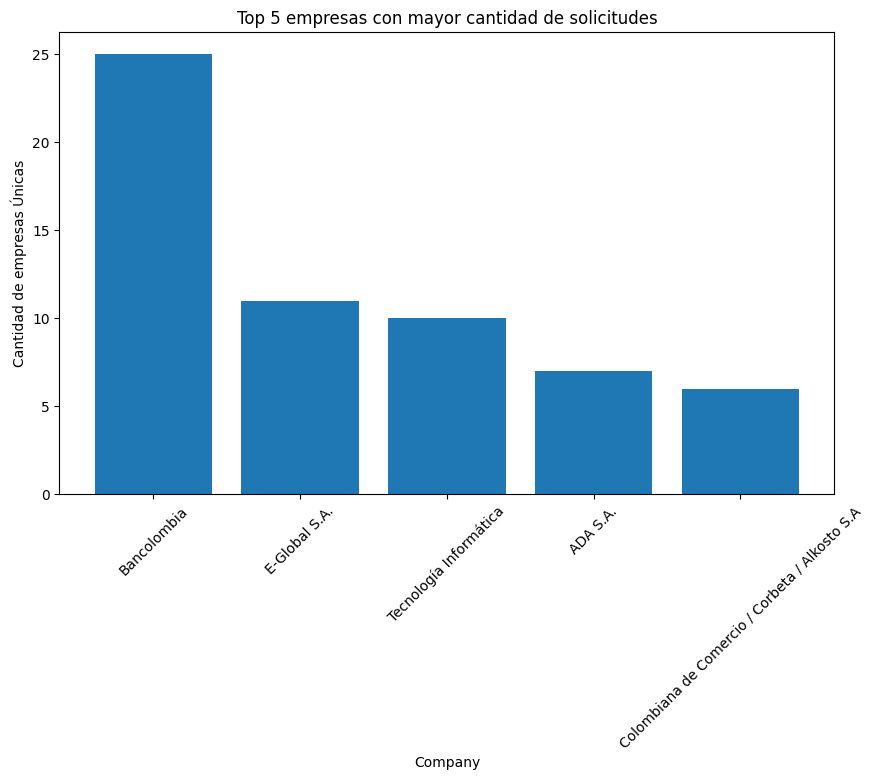

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_empresas['Company'], top_5_empresas['Title'])
plt.xlabel('Company')
plt.ylabel('Cantidad de empresas Únicas')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.xticks(rotation=45)
plt.show()

- Grafico de pastel:

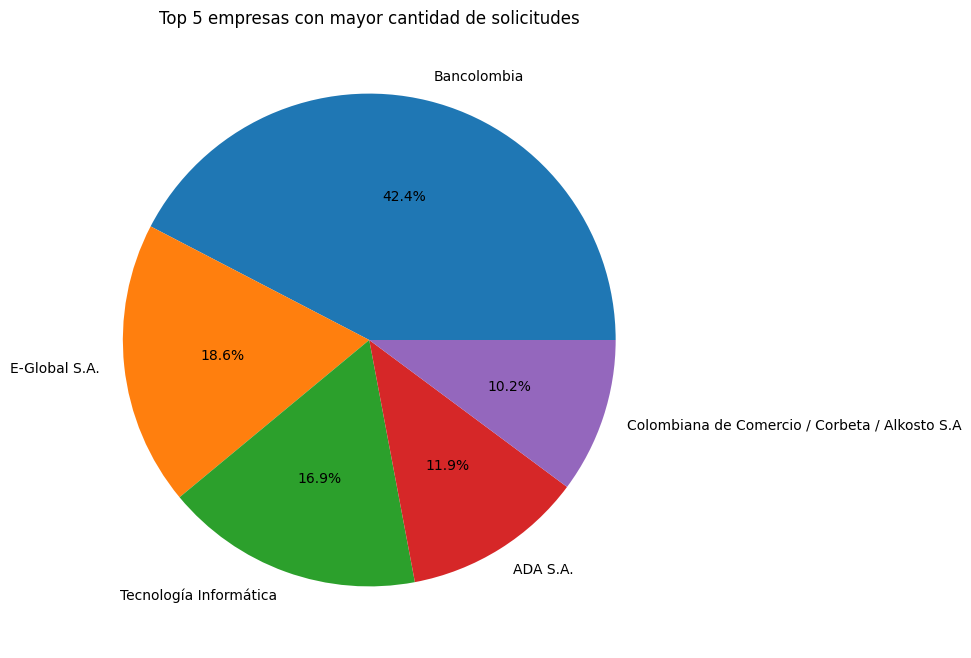

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_empresas['Title'], labels=top_5_empresas['Company'], autopct='%1.1f%%')
plt.title('Top 5 empresas con mayor cantidad de solicitudes')
plt.show()

- Mapa

In [28]:
# Inicializa el objeto geocoder de Google Maps
geolocator = GoogleV3(api_key=Keys.google_api_key)  # Reemplaza 'tu_api_key_de_google_maps' con tu propia clave API de Google Maps

def obtener_latitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None
    
def obtener_longitud(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error al obtener coordenadas para {ciudad}: {str(e)}")
        return None, None

In [29]:
top_5_ubicacion['Latitud'] = top_5_ubicacion['Location'].apply(obtener_latitud)
top_5_ubicacion['Longitud'] = top_5_ubicacion['Location'].apply(obtener_longitud)

In [30]:
top_5_ubicacion

,Location,Title,Latitud,Longitud
4,"Bogota, D.C., Capital District, Colombia",74,4.710989,-74.072092
9,Colombia,32,4.570868,-74.297333
21,"Medellín, Antioquia, Colombia",19,6.247638,-75.565815
6,"Cali, Valle del Cauca, Colombia",13,3.451647,-76.531985
20,"Medellin, Antioquia, Colombia",12,6.247638,-75.565815


In [31]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in top_5_ubicacion.iterrows():
    ciudad = row['Location']
    latitud = row['Latitud']
    longitud = row['Longitud']
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color='black')
    ).add_to(mapa)

mapa

In [32]:
df['Latitud'] = df['Location'].apply(obtener_latitud)
df['Longitud'] = df['Location'].apply(obtener_longitud)

In [33]:
#Se crea un mapa centrado en la capital
mapa = folium.Map(location=[4.710989, -74.072092], zoom_start=5.5)

# Resaltar las 5 ciudades principales en el mapa
for _, row in df.iterrows():
    ciudad = row['Location']
    latitud = row['Latitud']
    longitud = row['Longitud']
    folium.Marker(
        location=[latitud, longitud],
        popup=ciudad,
        icon=folium.Icon(icon='home', color='black')
    ).add_to(mapa)

mapa